## Generative Adversarial Networks - Physics Informed - Burger Equation

### Imports and Configs

In [1]:
import time
import os
import scipy.io
import random
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from gan_pde import*
from scipy.interpolate import griddata
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rc
rc('text', usetex=False)
%matplotlib inline

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' 

seed  = 340
tf.set_random_seed(seed)
np.random.seed(seed)
random.seed(seed)

### Load Data

In [2]:
path_lib = os.path.dirname(os.getcwd())
path_resources = os.path.join(path_lib, 'resources')
path_data = os.path.join(path_resources, 'data')
path_models = os.path.join(path_resources, 'models')

filename = 'burgers_shock.mat'
path_file = os.path.join(path_data, filename)
data = scipy.io.loadmat(path_file)

### Deep Learning Params

In [3]:
n_u = 50
n_boundary_t_0 = 100

latent_var_nb = 1

gen_layer_lst = [50, 50, 50, 50, 1]
pos_layer_lst = [50, 50, 50, 50, 1]
dis_layer_lst = [50, 50, 50, 1]

gen_activation_lst = [tf.nn.tanh for i in range(len(gen_layer_lst)-1)]
pos_activation_lst = [tf.nn.tanh for i in range(len(pos_layer_lst)-1)]
dis_activation_lst = [tf.nn.tanh for i in range(len(dis_layer_lst)-1)]
gen_activation_lst.append(None)
pos_activation_lst.append(None)
dis_activation_lst.append(None)

w_pde_loss = 1.0
w_posterior_loss = 1.5

learning_rate = 0.00005
batch_size = 150
dis_steps_nb = 3
gen_steps_nb = 6
iter_nb = 14000

### Prepare Data for Training

In [4]:
t_data = data['t'].flatten()[:, None]
x_data = data['x'].flatten()[:, None]
u_actual = np.real(data['usol']).T
x_mesh, t_mesh = np.meshgrid(x_data, t_data)


data_dict = dict(x=x_mesh.flatten(), t=t_mesh.flatten(), u=u_actual.flatten())
df_data = pd.DataFrame(data_dict)

idx_train = pd.Index(np.random.choice(len(df_data), n_u, replace=False))
idx_boundary_t_0 = pd.Index(np.random.choice(df_data[df_data.t == 0.0].index, n_boundary_t_0, replace=False))
idx_train = idx_train.append((idx_boundary_t_0))

idx_test = df_data.index.difference(idx_train)

u_train = df_data.u[idx_train].values[:,None]
x_train = df_data.x[idx_train].values[:,None]
t_train = df_data.t[idx_train].values[:,None]

u_test = df_data.u[idx_test].values[:,None]
x_test = df_data.x[idx_test].values[:,None]
t_test = df_data.t[idx_test].values[:,None]

### GAN Training

Iter: 0,  discriminator: 1.4635,  generator: 0.4830,  entropy: -0.0379,  posterior: 0.3394,  pde: 0.1815


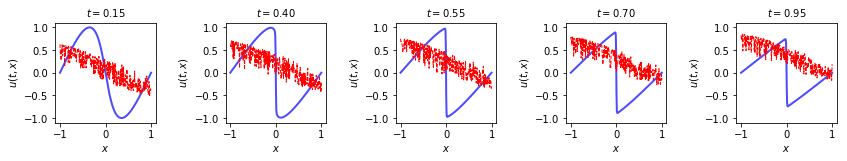

Iter: 500,  discriminator: 1.3902,  generator: 0.0062,  entropy: -0.0067,  posterior: 0.0002,  pde: 0.0127
Iter: 1000,  discriminator: 1.3907,  generator: 0.0149,  entropy: 0.0035,  posterior: 0.0000,  pde: 0.0113
Iter: 1500,  discriminator: 1.3631,  generator: 0.1265,  entropy: 0.0775,  posterior: 0.0000,  pde: 0.0489
Iter: 2000,  discriminator: 1.3798,  generator: 0.0290,  entropy: 0.0133,  posterior: 0.0000,  pde: 0.0157


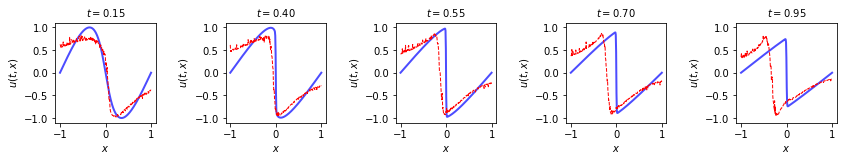

Iter: 2500,  discriminator: 1.3812,  generator: 0.0254,  entropy: -0.0289,  posterior: 0.0000,  pde: 0.0543
Iter: 3000,  discriminator: 1.3208,  generator: 0.0932,  entropy: 0.0865,  posterior: 0.0000,  pde: 0.0066
Iter: 3500,  discriminator: 1.3880,  generator: -0.0087,  entropy: -0.0154,  posterior: 0.0000,  pde: 0.0067
Iter: 4000,  discriminator: 1.3847,  generator: 0.0044,  entropy: 0.0030,  posterior: 0.0000,  pde: 0.0013


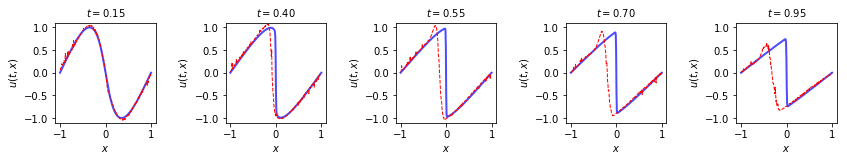

Iter: 4500,  discriminator: 1.3843,  generator: -0.0050,  entropy: -0.0059,  posterior: 0.0000,  pde: 0.0009
Iter: 5000,  discriminator: 1.3836,  generator: 0.0099,  entropy: 0.0090,  posterior: 0.0000,  pde: 0.0009
Iter: 5500,  discriminator: 1.3822,  generator: -0.0026,  entropy: -0.0035,  posterior: 0.0000,  pde: 0.0009
Iter: 6000,  discriminator: 1.3819,  generator: 0.0103,  entropy: 0.0099,  posterior: 0.0000,  pde: 0.0004


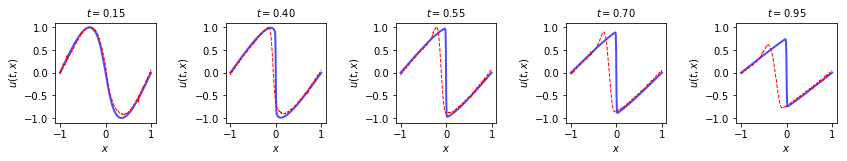

Iter: 6500,  discriminator: 1.3810,  generator: 0.0004,  entropy: 0.0003,  posterior: 0.0000,  pde: 0.0001
Iter: 7000,  discriminator: 1.3810,  generator: 0.0140,  entropy: 0.0135,  posterior: 0.0000,  pde: 0.0005
Iter: 7500,  discriminator: 1.3805,  generator: 0.0277,  entropy: 0.0272,  posterior: 0.0000,  pde: 0.0005
Iter: 8000,  discriminator: 1.3802,  generator: -0.0077,  entropy: -0.0080,  posterior: 0.0000,  pde: 0.0003


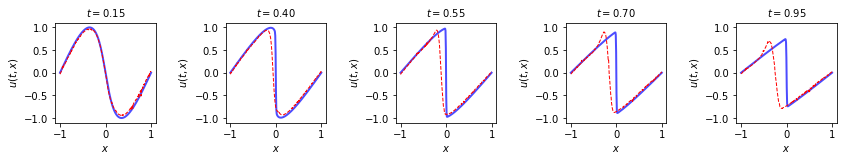

Iter: 8500,  discriminator: 1.3800,  generator: 0.0010,  entropy: 0.0007,  posterior: 0.0000,  pde: 0.0002
Iter: 9000,  discriminator: 1.3798,  generator: 0.0066,  entropy: 0.0065,  posterior: 0.0000,  pde: 0.0001
Iter: 9500,  discriminator: 1.3795,  generator: 0.0088,  entropy: 0.0086,  posterior: 0.0000,  pde: 0.0002
Iter: 10000,  discriminator: 1.3792,  generator: -0.0039,  entropy: -0.0047,  posterior: 0.0000,  pde: 0.0007


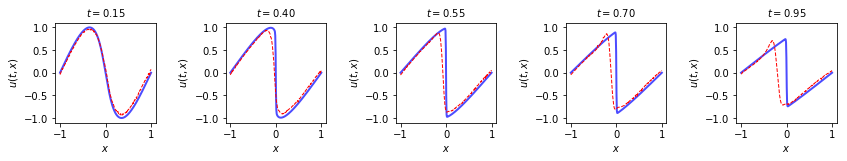

Iter: 10500,  discriminator: 1.3789,  generator: 0.0088,  entropy: 0.0085,  posterior: 0.0000,  pde: 0.0002
Iter: 11000,  discriminator: 1.3797,  generator: 0.0215,  entropy: 0.0201,  posterior: 0.0000,  pde: 0.0014
Iter: 11500,  discriminator: 1.3784,  generator: 0.0189,  entropy: 0.0187,  posterior: 0.0000,  pde: 0.0002
Iter: 12000,  discriminator: 1.3779,  generator: 0.0261,  entropy: 0.0259,  posterior: 0.0000,  pde: 0.0003


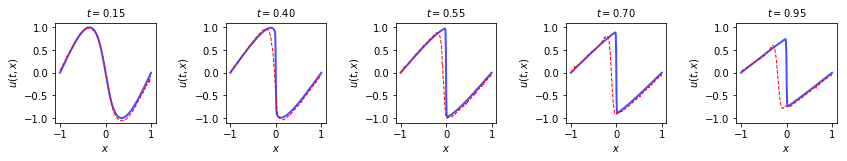

Iter: 12500,  discriminator: 1.3783,  generator: 0.0216,  entropy: 0.0212,  posterior: 0.0000,  pde: 0.0004
Iter: 13000,  discriminator: 1.3774,  generator: 0.0288,  entropy: 0.0286,  posterior: 0.0000,  pde: 0.0002
Iter: 13500,  discriminator: 1.3775,  generator: 0.0263,  entropy: 0.0260,  posterior: 0.0000,  pde: 0.0003


In [5]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 1], name='x')
t = tf.placeholder(tf.float32, [None, 1], name='t')

with tf.variable_scope('generator'):
    u_sample = tf.placeholder(tf.float32, [None, latent_var_nb], name='u_sample')
    mlp_config_generator = MLPConfig(layer_size_lst=gen_layer_lst,
                                     activation_lst=gen_activation_lst,
                                     main_name='generator')
    net_pde = create_mlp(tf.concat([x, t, u_sample], 1), mlp_config_generator)
    gen_pde = tf.concat([x, t, net_pde], axis=1, name='gen_pde')
    mlp_config_posterior = MLPConfig(layer_size_lst=pos_layer_lst, 
                                   activation_lst=pos_activation_lst, 
                                   main_name='posterior')
    logits_posterior = create_mlp(gen_pde, mlp_config_posterior)
    net_pde_residuals = net_pde_res_burger(net_pde, x, t)
    
    
with tf.variable_scope('discriminator') as scope:
    u_real = tf.placeholder(tf.float32, [None, 1])
    mlp_config_discriminator = MLPConfig(layer_size_lst=dis_layer_lst, 
                                         activation_lst=dis_activation_lst, 
                                         main_name='discriminator')
    logits_real = create_mlp(tf.concat([x, t, u_real], 1), mlp_config_discriminator)
    scope.reuse_variables()
    logits_fake = create_mlp(gen_pde, mlp_config_discriminator)

dis_loss = discriminator_loss(logits_real, logits_fake)
gen_loss, gen_loss_entropy, gen_loss_posterior, gen_loss_pde = generator_loss(logits_fake, logits_posterior, net_pde_residuals, w_posterior_loss, w_pde_loss)

gen_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="generator")
dis_vars = tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope="discriminator")
gen_minimize_step = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-08).minimize(gen_loss, var_list=gen_vars)
dis_minimize_step = tf.train.AdamOptimizer(learning_rate=learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-08).minimize(dis_loss, var_list=dis_vars)

init = tf.global_variables_initializer()
model_saver = tf.train.Saver()

with tf.Session() as sess:        
    sess.run(init)
    for i in range(iter_nb):
        idx_batch = np.random.choice(u_train.shape[0], batch_size, replace=False)   
        u_real_batch = u_train[idx_batch, :]
        u_sample_batch = np.random.normal(size=(u_real_batch.shape[0], latent_var_nb))
        x_batch = x_train[idx_batch, :]
        t_batch = t_train[idx_batch, :]
        for _ in range(dis_steps_nb):
            run_lst = [dis_minimize_step, dis_loss]
            feed_dict = {u_real: u_real_batch, u_sample: u_sample_batch, x: x_batch, t: t_batch}
            _, d_loss = sess.run(run_lst, feed_dict=feed_dict)

        for _ in range(gen_steps_nb):
            run_lst = [gen_minimize_step, gen_loss, gen_loss_entropy, gen_loss_posterior, gen_loss_pde]
            feed_dict = feed_dict={u_sample: u_sample_batch,  x: x_batch, t: t_batch}
            _, g_loss, g_loss_entropy, g_loss_posterior, g_loss_pde = sess.run(run_lst, feed_dict=feed_dict)
            
        if i==0:
            loss_array = np.array([i,d_loss,g_loss,g_loss_entropy, g_loss_posterior, g_loss_pde])
        if i % 500 == 0:
            str_out = "Iter: %d,  discriminator: %.4f,  generator: %.4f,  entropy: %.4f,  posterior: %.4f,  pde: %.4f"
            print(str_out % (i, d_loss, g_loss, g_loss_entropy, g_loss_posterior, g_loss_pde))
            loss_array = np.vstack((loss_array, np.array([i,d_loss,g_loss,g_loss_entropy, g_loss_posterior, g_loss_pde])))

        if i % 2000 == 0:
            u_test_sample = np.random.normal(size=(u_test.shape[0], latent_var_nb))
            x_gen = sess.run(gen_pde, feed_dict={u_sample: u_test_sample, x: x_test, t: t_test})
            u_pred = griddata(df_data.loc[idx_test,['x', 't']], x_gen[:,2].flatten(), (x_mesh, t_mesh), method='cubic')

            cut_lst = [15, 40, 55, 70, 95]
            fig = plt.figure(figsize=(14,10))
            ax = fig.add_subplot(111)
            ax.axis('off')
            plot_nb = len(cut_lst)
            gs0 = gridspec.GridSpec(1, plot_nb, wspace=0.7)
            for j in range(plot_nb):
                plot_cut_test(grid_spec=gs0[0,j], x=x_data, actual=u_actual, pred=u_pred, cut=cut_lst[j], x_lim=[-1.1,1.1], y_lim=[-1.1,1.1])

            plt.savefig('figures/burger/diff{0:.0f}.png'.format(i))
            plt.show()
    model_saver.save(sess, os.path.join(path_models, "gan_burger.ckpt"))

### 3D Actual vs Predicted 

In [ ]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go

# Make plotly work with Jupyter notebook
init_notebook_mode()

pred = go.Scatter3d(
    x = df_data.t,
    y = df_data.x,
    z = u_pred.flatten(),
    marker = go.Marker(color='red', size=1.5),
    mode = 'markers'
)

actual = go.Scatter3d(
    x = df_data.t,
    y = df_data.x,
    z = df_data.u,
    marker = go.Marker(color='blue', size=1.5),
    mode = 'markers'
)

data = go.Data([pred, actual])

iplot(data)

### Loss Functions

In [ ]:
df_loss = pd.DataFrame(loss_array, columns=['iteration', 'discriminator', 'generator', 'entropy', 'posterior', 'pde'])
# df.plot(x=df.iteration, y=df.columns[1:], figsize=(17,8), fontsize=12)
df_loss.iteration = df_loss.iteration.astype(int)
df_loss.set_index(df_loss.iteration, inplace=True)
df_loss.drop(['iteration'], axis=1, inplace=True)
df_loss.plot(figsize=(17,8), fontsize=12)